<a href="https://colab.research.google.com/github/brandon-setegn/fta-724-machine-learning-ai/blob/master/notebooks/Module_2_ML_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Background**

Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations (a.k.a. default), with the implication that a lender may not receive the owed principal and interest and subsequently experience interruption of cash flows and/or increased costs for debt collection.

The systematic evaluation of credit risk is a relatively recent area which started in the beginning of the 20th century by credit scoring agencies (pioneered by Equifax, Transunion and Experion). As such, individual and local human judgment are largely irrelevant to the credit reporting process. Instead, credit agencies and other big financial institutions extending credit at the retail level collect large amounts of data to predict whether defaults or other adverse events will occur, based on several customer and transaction information.

In this Analysis, we study a small dataset containing a number of such information and how it may inform decision making on an risk evaluation outcome, which consists of identifying good or a bad credit risk. In this case, we are interested in using predictive modeling and machine learning to **validate/improve** upon an early stage evaluation where human judgment was used to label records as either good or poor credit. As such, we employ supervised machine learning to draw upon the demographic informtaion of applicants and estimate the likelihood of them turning good or bad credit.

The following credit dataset in raw form has 14 predictor variables and 1225 records, each record being a prior applicant for credit. Applicant were rated as “good credit” (902 cases) coded as 0, or “bad credit” (323 cases) coded as 1 in the column 'bad'. New applicants for credit can also be evaluated on these predictor variables and classified as a good or a bad credit risk based on the predictor values.

In [1]:
#let's import the libraries we are going to need
import os, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
#%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Development/machine_learning/fta724')

In [4]:
df = pd.read_csv('module_2_lending_club_credit.csv',index_col=False)
df.columns = df.columns.str.lower()

In [5]:
df

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
1,41,2,0,1,0,P,36000,O,0,0,280,664,0,80,0
2,66,0,0,1,0,N,30000,N,0,0,0,0,0,0,0
3,51,2,0,1,0,P,464,O,24928,8464,584,320,0,60,0
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52,4,1,1,0,V,37764,U,0,0,0,340,0,0,0
1221,56,3,0,1,1200,P,31500,O,6928,46464,784,256,0,0,1
1222,60,0,0,1,0,E,46800,O,11392,928,1144,680,0,108,0
1223,20,0,0,1,0,R,0,N,0,0,0,0,0,0,1


A bief description of the variables in this dataset are as follows:

> **Bad:** Good/bad indicator: 1 = Bad, 0 = Good.

> **yob:** Year of birth (If unknown the year will be 99).

> **nkid:** Number of children.

> **dep:** Number of other dependents.

> **phon:** Is there a home phone (1=yes, 0 = no)

> **sinc:** Spouse's income.

> **aes:** Applicant's employment status: V = Government, W = housewife, M = military, P = private sector, B = public sector, R = retired, E = self employed, T = student, U = unemployed, N = others, Z  = no response.

> **dainc:** Applicant's income.

> **res:** Residential status: O = Owner, F = tenant furnished, U = Tenant Unfurnished, P = With parents, N = Other, Z = No response.

> **dhval:** Value of Home: 0 = no response or not owner, 000001 = zero valu, blank = no response.

> **dmort:** Mortgage balance outstanding: 0 = no response or not owner, 000001 = zero balance, blank = no response.

> **doutm:** Outgoings on mortgage or rent.

> **doutl:** Outgoings on Loans.

> **douthp:** Outgoings on Hire Purchase.

> **doutcc:** Outgoings on credit card.

Let's carry out simple exploratory data analysis (**EDA**).

In [6]:
df['dainc'].describe()

count     1225.000000
mean     21244.211429
std      15896.207986
min          0.000000
25%       9000.000000
50%      19500.000000
75%      30600.000000
max      64800.000000
Name: dainc, dtype: float64

In [7]:
#Some income values are set to 0 (probably due to missingness).
df[df['dainc']==0]

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
20,31,0,0,1,20000,U,0,O,0,0,0,0,0,0,1
39,45,0,0,1,30000,W,0,O,21248,14464,0,0,0,0,0
47,68,0,0,1,0,T,0,P,48928,6464,0,0,0,0,0
48,99,0,0,1,0,R,0,O,34464,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,69,0,0,1,0,T,0,P,0,0,0,0,0,0,0
1201,65,0,0,0,0,M,0,F,0,0,0,200,336,104,0
1211,8,0,0,1,0,R,0,U,0,0,0,0,0,0,1
1218,22,0,0,1,0,R,0,O,14464,4,0,0,0,0,1


In [8]:
#We may use mean income to imute the 0 values.
mean_income = df[df['dainc']!=0]['dainc'].mean()

df.loc[df["dainc"] == 0, "dainc"] = mean_income

df['dainc'].describe()

count     1225.000000
mean     25538.919529
std      12703.432640
min        464.000000
25%      17100.000000
50%      25538.919529
75%      30600.000000
max      64800.000000
Name: dainc, dtype: float64

In [9]:
df.nsmallest(5,['yob'])

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad
698,3,0,0,1,0,R,25538.919529,O,28928,4,0,0,0,0,1
988,7,0,0,1,0,R,12000.000000,N,0,0,0,0,0,0,1
1017,7,0,0,1,0,R,25538.919529,O,0,0,0,0,0,0,1
1084,7,0,0,1,0,R,25538.919529,O,14464,4,0,0,0,0,0
313,8,0,0,1,10313,R,36855.000000,O,48928,4,0,0,0,0,0


In [10]:
df.nlargest(10,['yob'])

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad
48,99,0,0,1,0,R,25538.919529,O,34464,4,0,0,0,0,0
748,99,2,0,1,11070,P,36000.000000,O,35392,28928,1576,0,0,1600,0
777,99,0,0,0,0,Z,25538.919529,N,0,0,0,0,0,0,1
813,99,0,0,1,0,R,25538.919529,U,0,0,0,0,0,0,1
987,99,0,0,0,0,Z,25538.919529,N,0,0,0,0,0,0,0
1100,99,0,0,1,0,Z,21000.000000,N,0,0,0,0,0,60,0
1180,99,0,0,0,0,R,25538.919529,N,0,0,0,0,0,0,1
172,69,0,0,1,0,T,4329.000000,P,0,0,0,0,0,0,0
306,69,0,0,1,0,V,9000.000000,P,0,0,0,0,0,0,1
341,69,0,0,1,0,M,15000.000000,F,0,0,0,0,0,0,1


In [11]:
#applicants with unknown age or year of birth less than 18. Should we keep those or set to remove?
df[(df['yob']<18) | (df['yob']==99)]


,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad
43,13,0,0,0,850,R,37500.000000,U,0,0,520,0,0,0,0
48,99,0,0,1,0,R,25538.919529,O,34464,4,0,0,0,0,0
79,15,0,0,1,0,R,15300.000000,O,42464,0,0,0,0,0,0
120,17,0,0,1,0,R,16200.000000,F,0,0,160,0,0,0,0
144,13,0,0,1,0,R,45000.000000,O,6784,4,0,0,0,400,0
235,12,0,0,1,0,R,25538.919529,U,0,0,276,0,0,0,0
275,14,0,0,1,0,R,9900.000000,O,54464,4,0,0,0,0,0
288,11,0,0,1,0,R,25538.919529,N,0,0,0,0,0,0,0
290,15,0,0,1,0,R,27000.000000,O,28928,0,0,0,0,0,1
313,8,0,0,1,10313,R,36855.000000,O,48928,4,0,0,0,0,0


Let's look at the good/bad distribution. Out of a total of 1225 records, 323 or approximately 26% are flagged as bad credit.

0    902
1    323
Name: bad, dtype: int64

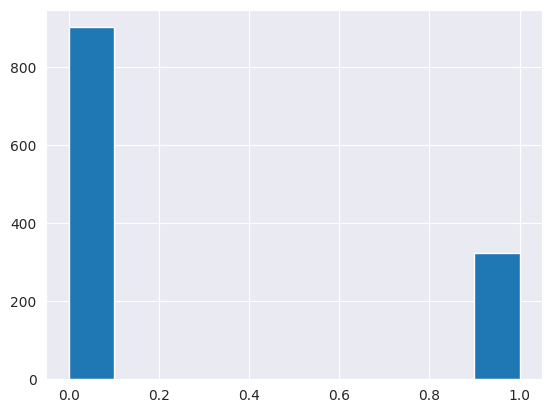

In [12]:
sns.set_style('darkgrid')
df.bad.hist();
df.bad.value_counts()

We may run a summary statistics of the numeric variables in data:

In [64]:
df.describe(include='all')

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad,dout_tot,dout_tot_dainc_ratio,dmort_dainc_ratio
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225,1225.000000,1225,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,P,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,531,NaN,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,NaN,25538.919529,NaN,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673,532.248163,0.028387,0.602309
std,15.301818,1.016013,0.219917,0.295159,4802.341425,NaN,12703.432640,NaN,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804,996.007686,0.108631,3.653527
min,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,464.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,NaN,17100.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,NaN,25538.919529,NaN,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000,388.000000,0.015964,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,NaN,30600.000000,NaN,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000,780.000000,0.029630,0.587967


We may visualize the distributions of the data items and study the relationships between variables and the outcome. Hoow applicant's income, expenses, mortgage balance, ... impact their overall risk?

Does applicant's **income** impact credit risk?

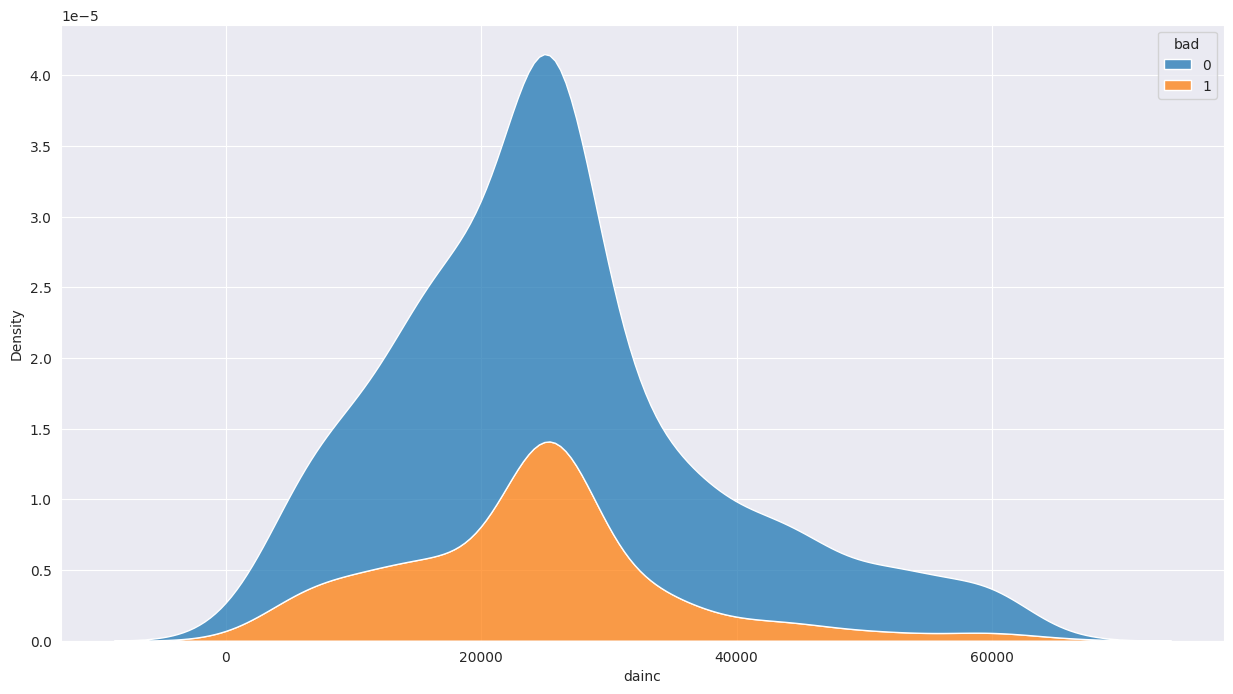

In [14]:
plt.figure(figsize=(15,8))
sns.kdeplot(x='dainc',hue='bad',data=df,multiple="stack");

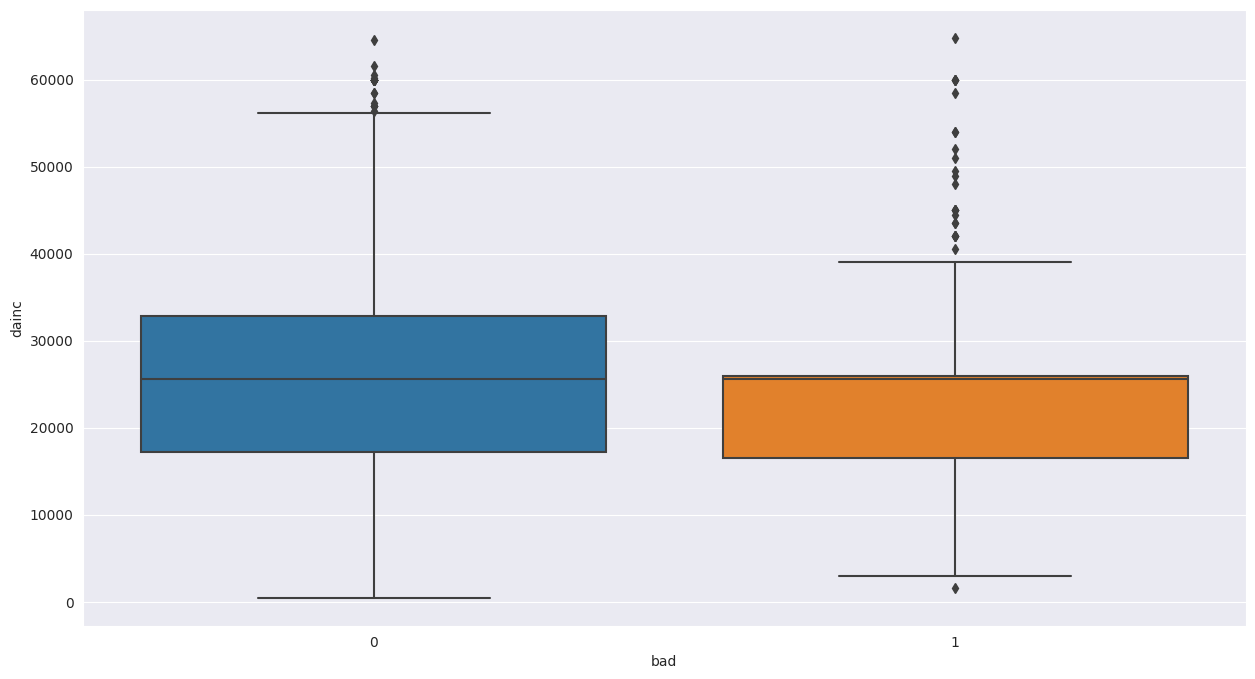

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'dainc', data=df);

Does the **value of home** impact the outcomecredit risk?

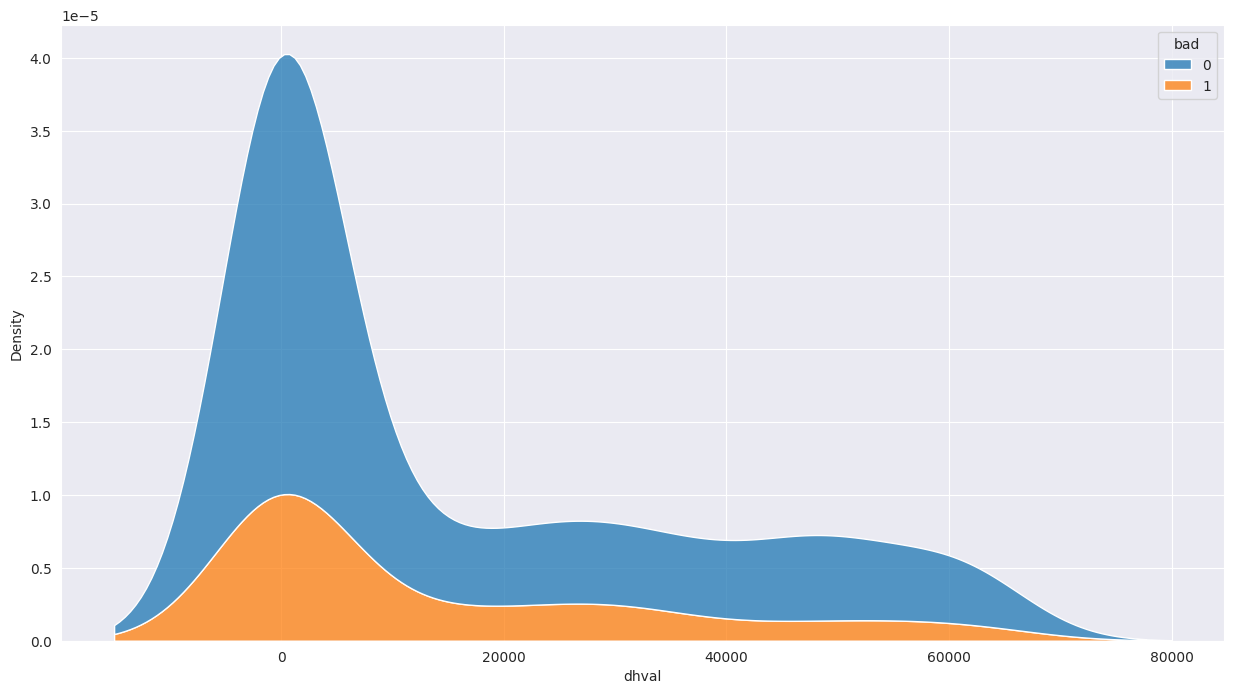

In [16]:
plt.figure(figsize=(15,8))
sns.kdeplot(x='dhval',hue='bad',data=df,multiple="stack");

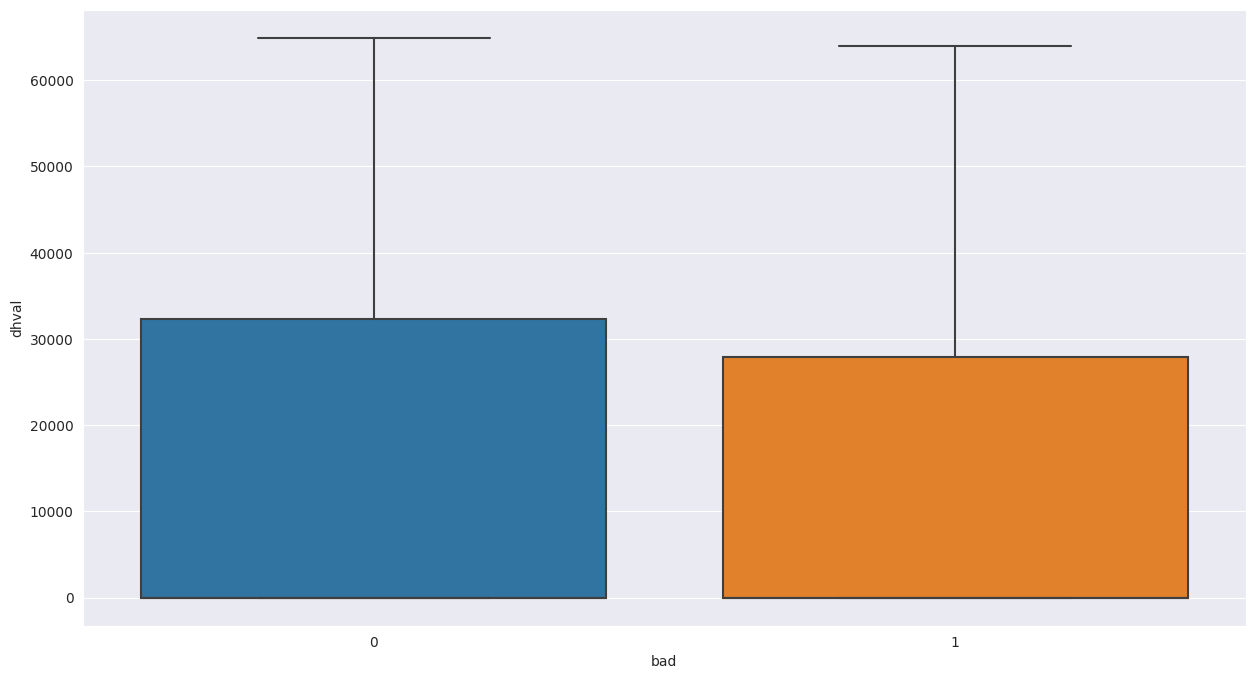

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'dhval', data=df);

Does applicant's **outgoings on mortgage or rent** impact the outcome?

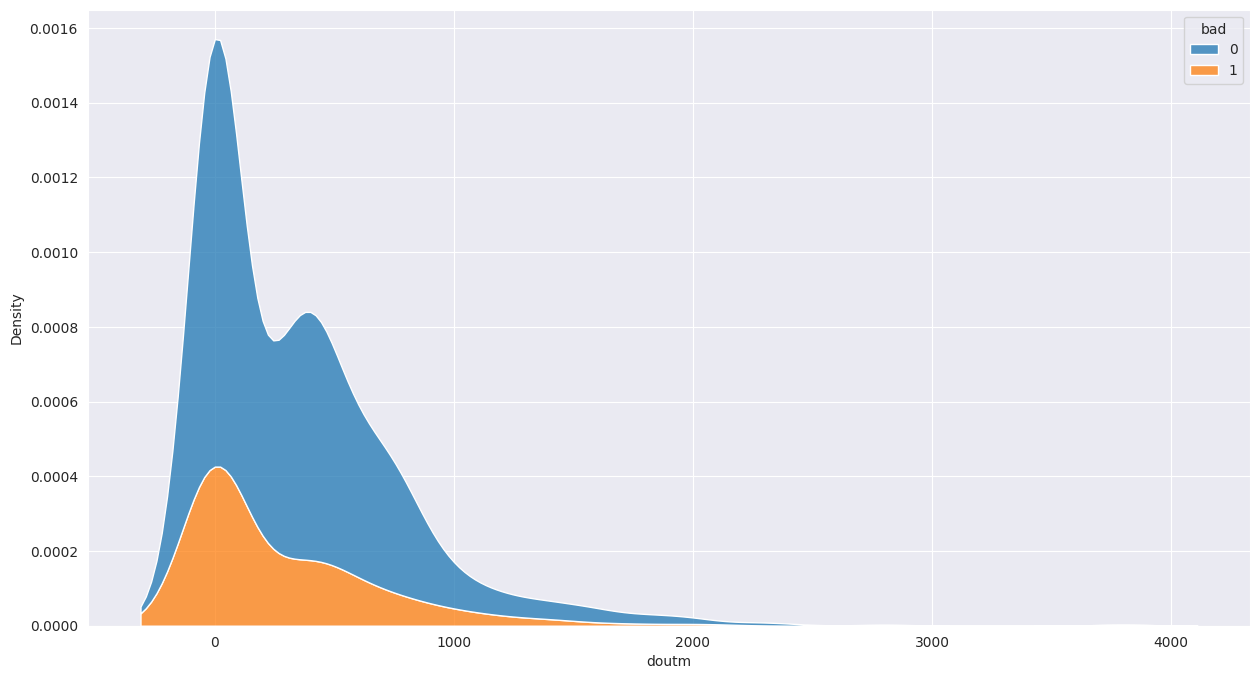

In [18]:
plt.figure(figsize=(15,8))
sns.kdeplot(x='doutm',hue='bad',data=df,multiple="stack");

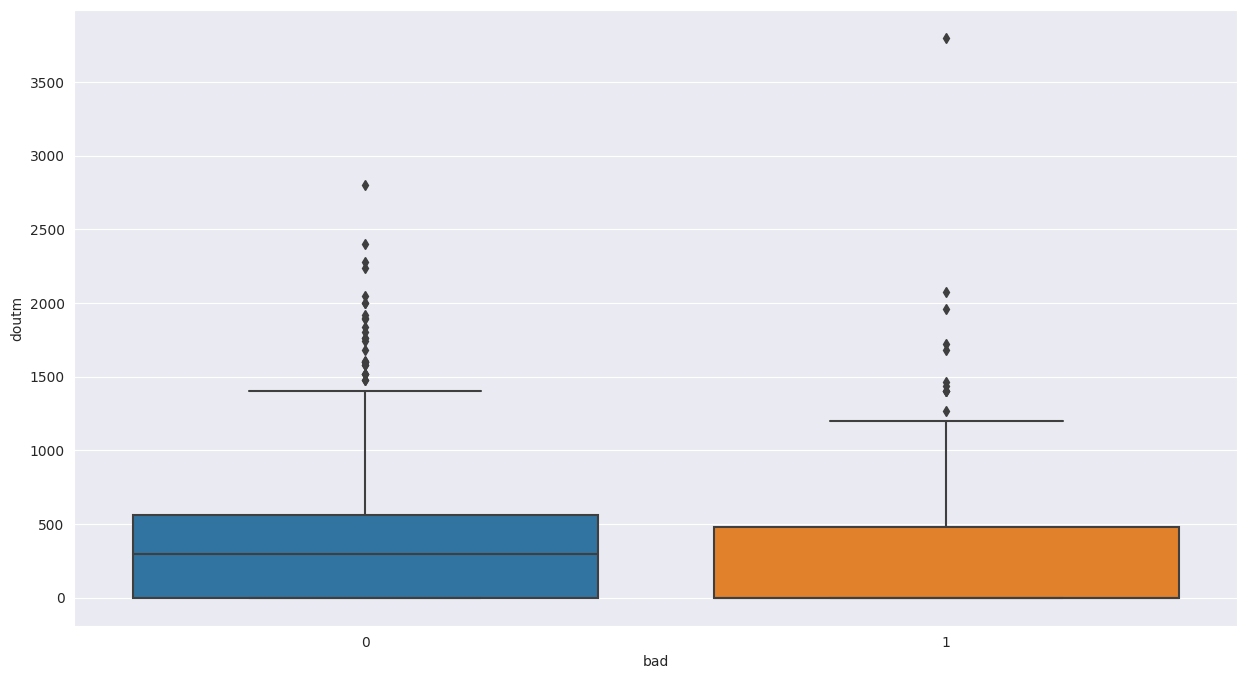

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'doutm', data=df);

Does applicant's **mortgage balance** impact the outcome?

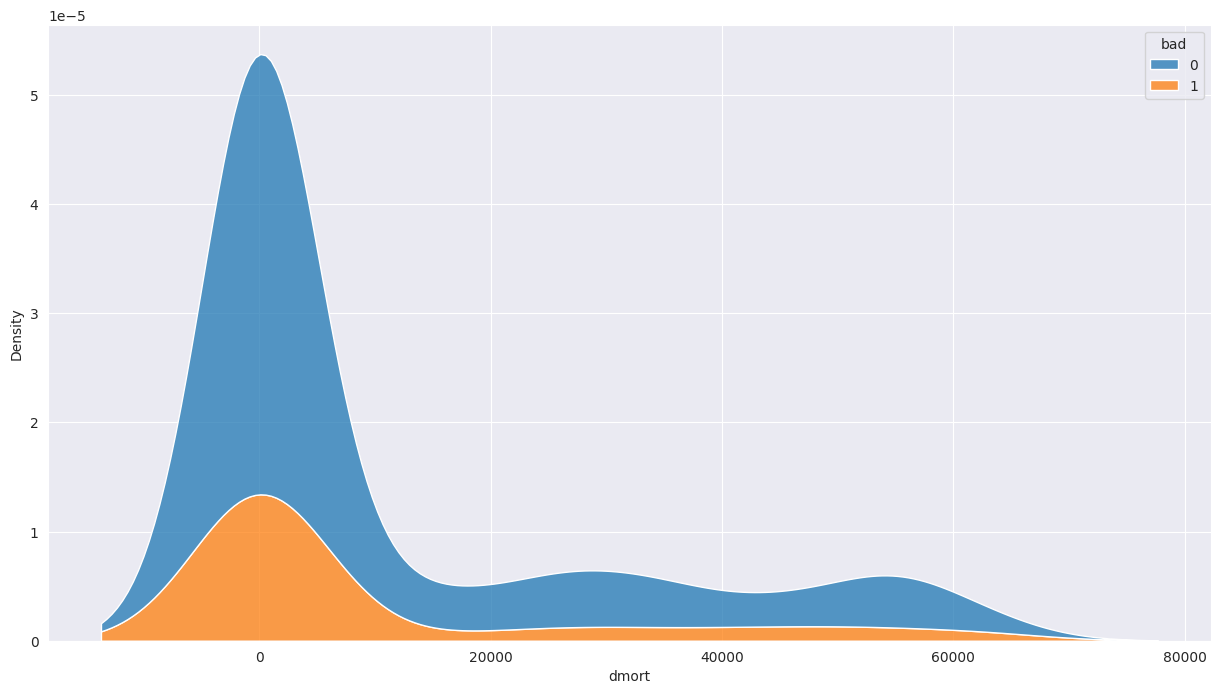

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(x='dmort',hue='bad',data=df,multiple="stack");

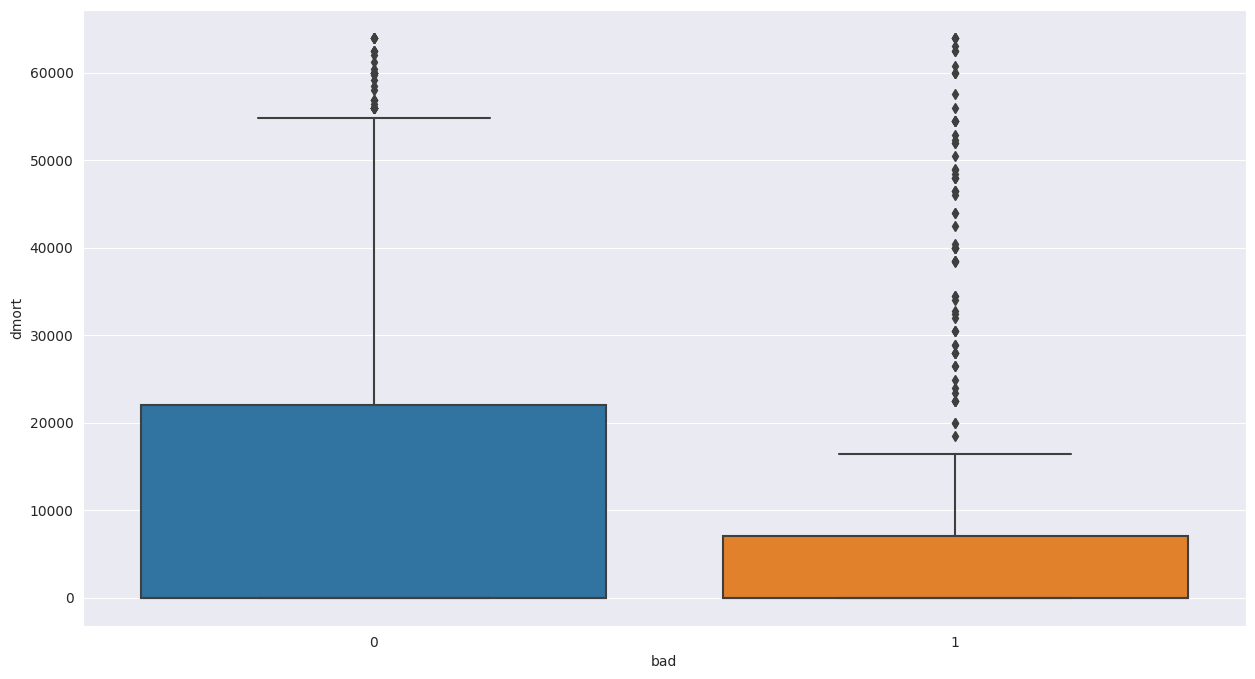

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'dmort', data=df);

Does applicant's **age** impact the outcome?

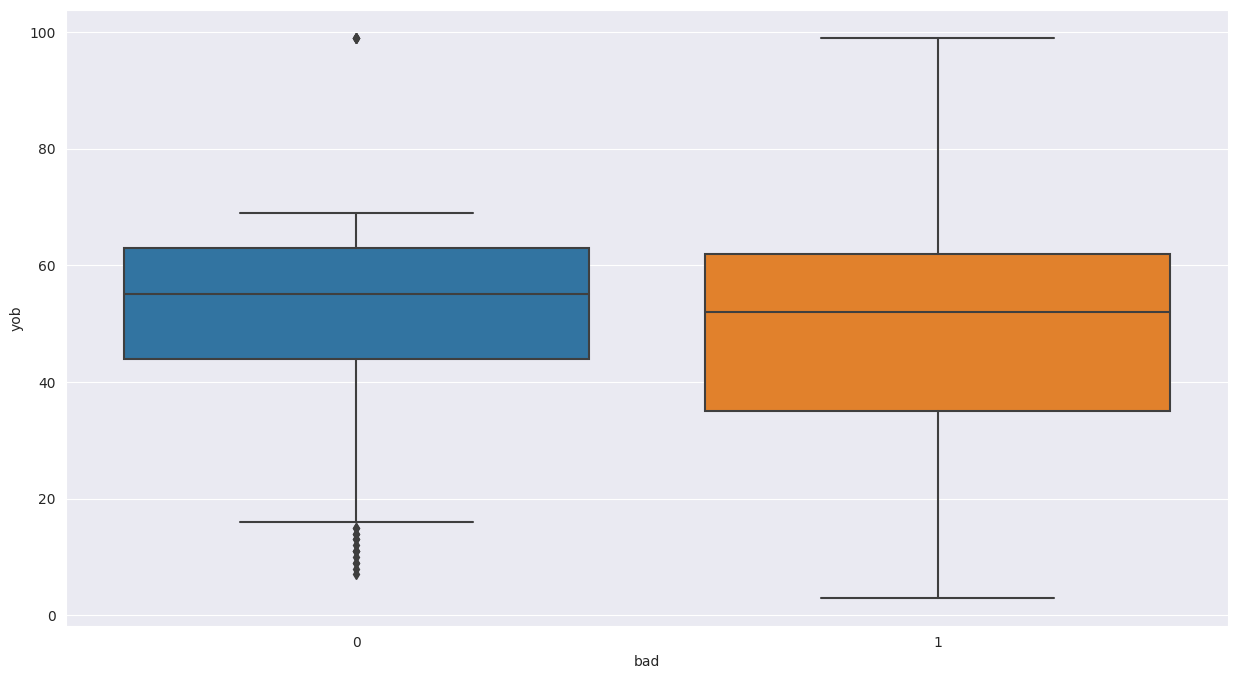

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'yob', data=df);

Does applicant's **age** impact credit risk across different residential status?

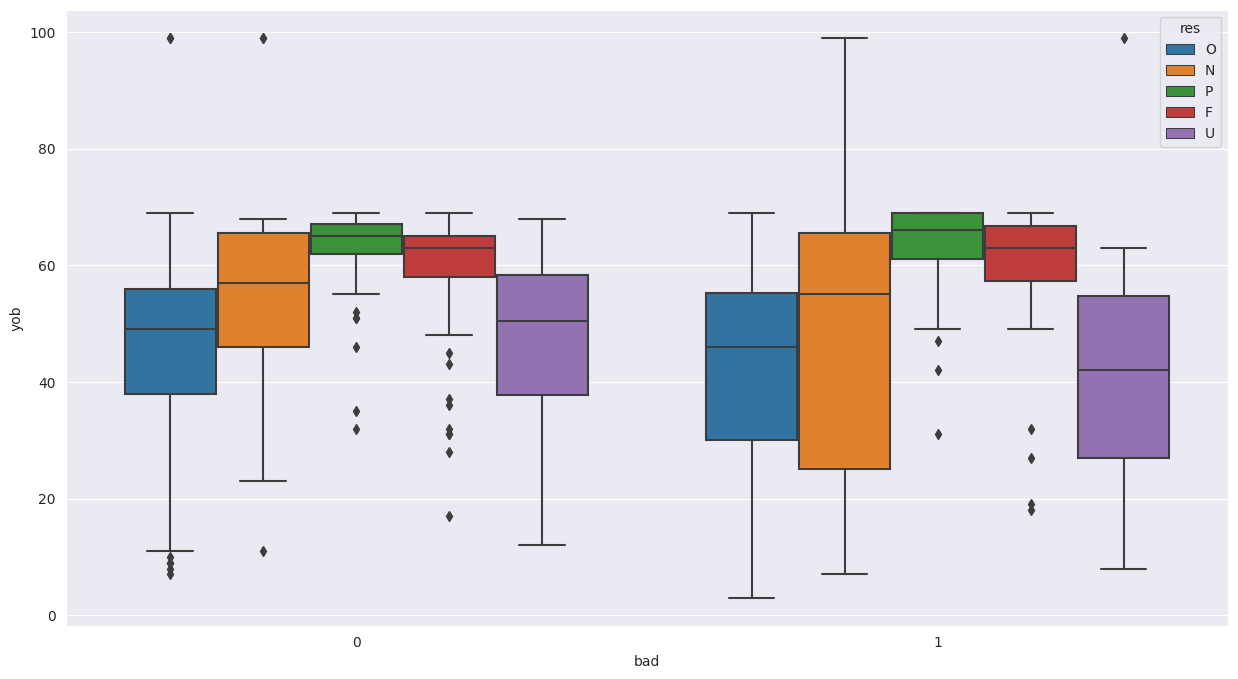

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'yob', hue='res', data=df);

Does applicant's **age** impact credit risk across different employment status?

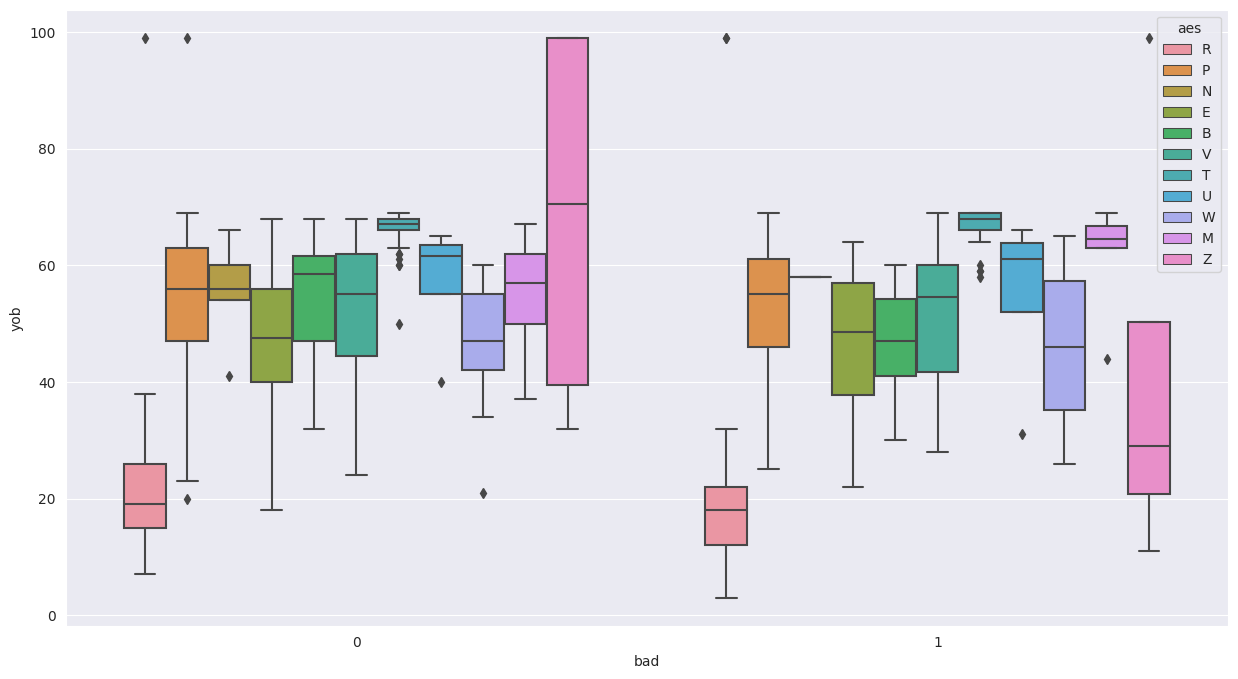

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bad', y = 'yob', hue='aes', data=df);

Is any **residential** group particularly riskier?


In [25]:
pd.crosstab(df.bad,df.res,normalize=True).round(2).style.highlight_max(axis=1).format("{:.2%}")

res,F,N,O,P,U
bad,,,,,
0,8.00%,3.00%,38.00%,16.00%,9.00%
1,2.00%,3.00%,13.00%,5.00%,3.00%


Is any **employment group** particularly riskier?


In [26]:
pd.crosstab(df.bad,df.aes,normalize=True).round(2).style.highlight_max(axis=1).format("{:.2%}")

aes,B,E,M,N,P,R,T,U,V,W,Z
bad,,,,,,,,,,,
0,2.00%,7.00%,1.00%,0.00%,34.00%,4.00%,7.00%,0.00%,15.00%,2.00%,0.00%
1,1.00%,3.00%,0.00%,0.00%,10.00%,4.00%,3.00%,0.00%,4.00%,1.00%,0.00%


### Simple feature engineering

We may create a new feature to reflect **total expenses** and study its impact on credit risk.

In [27]:
df['dout_tot'] = df.doutm + df.doutl + df.douthp + df.doutcc
df.dout_tot.describe()

count     1225.000000
mean       532.248163
std        996.007686
min          0.000000
25%          0.000000
50%        388.000000
75%        780.000000
max      28200.000000
Name: dout_tot, dtype: float64

In [28]:
df.dout_tot.value_counts()


0       392
400      35
320      21
800      18
480      17
       ... 
1144      1
872       1
468       1
772       1
1932      1
Name: dout_tot, Length: 323, dtype: int64

We observe many values in the total outgoing expenses are 0 (no response) and this may impact our analysis.

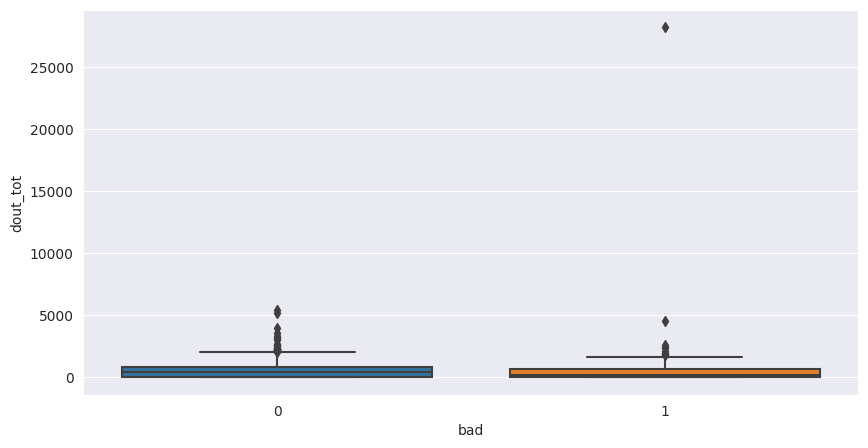

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(y='dout_tot',x='bad',data=df);

We can create a feature to reflect the total expense to income ratio:

In [30]:
df['dout_tot_dainc_ratio'] = df['dout_tot']/df['dainc']
df.dout_tot_dainc_ratio.describe()

count    1225.000000
mean        0.028387
std         0.108631
min         0.000000
25%         0.000000
50%         0.015964
75%         0.029630
max         2.077586
Name: dout_tot_dainc_ratio, dtype: float64

In [31]:
df['dout_tot_dainc_ratio'].nlargest(5)

3       2.077586
200     2.036660
417     1.827586
1081    1.104197
875     0.549451
Name: dout_tot_dainc_ratio, dtype: float64

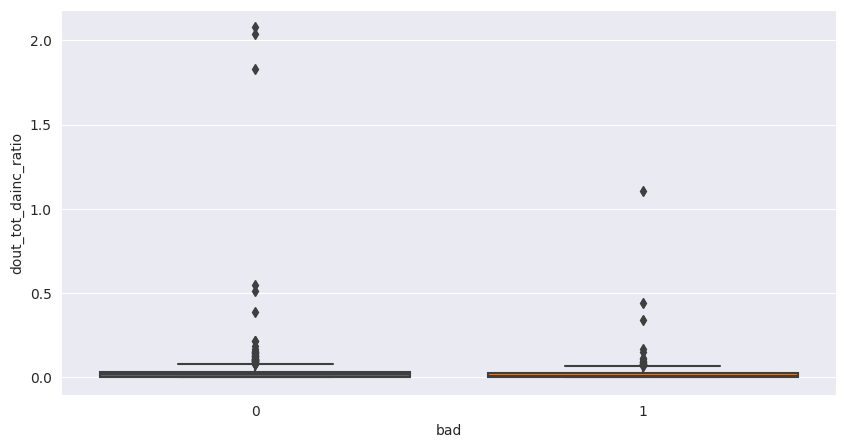

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(y='dout_tot_dainc_ratio',x='bad',data=df);

Let's also create another variable to reflect the ratio of the total mortgage balance "dmort" over applicant's income "dainc" and explore it's distributional properties.  

In [33]:
df['dmort_dainc_ratio'] = df['dmort']/df['dainc']
df.dmort_dainc_ratio.describe()

count    1225.000000
mean        0.602309
std         3.653527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.587967
max       120.689655
Name: dmort_dainc_ratio, dtype: float64

In [34]:
df['dmort_dainc_ratio'].nlargest(5)

417     120.689655
3        18.241379
262      16.000000
1097      9.734568
1049      8.888889
Name: dmort_dainc_ratio, dtype: float64

In [35]:
df[df['dmort_dainc_ratio']==np.max(df['dmort_dainc_ratio'])]

,yob,nkid,dep,phon,sinc,aes,dainc,res,dhval,dmort,doutm,doutl,douthp,doutcc,bad,dout_tot,dout_tot_dainc_ratio,dmort_dainc_ratio
417,33,2,0,1,1500,B,464.0,O,3392,56000,448,400,0,0,0,848,1.827586,120.689655


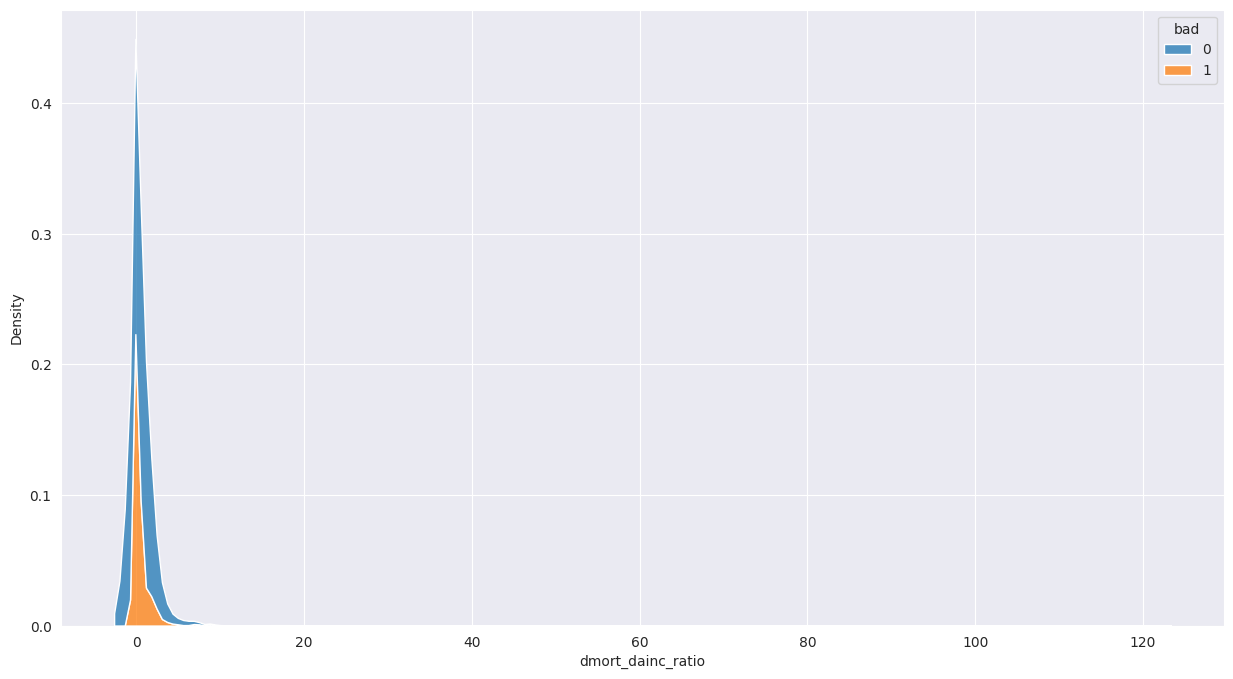

In [36]:
plt.figure(figsize=(15,8))
sns.kdeplot(x='dmort_dainc_ratio',hue='bad',data=df,multiple="stack");

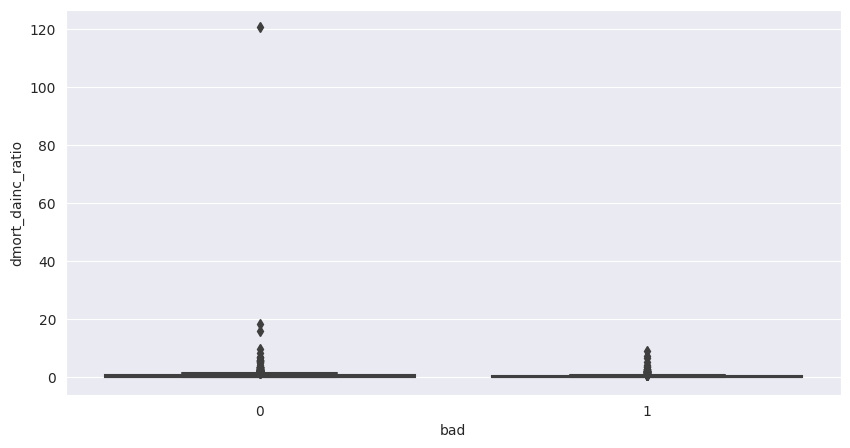

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(y='dmort_dainc_ratio',x='bad',data=df);

### **Machine Learning**

Now let's develop models to evaluate the riskiness of applicants given above variables. We use approximately 80% of data for model training and 20% for evaluation and model selection.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, balanced_accuracy_score,RocCurveDisplay #plot_roc_curve,
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Before we start modeling, we should convert categorical variables into **dummy** or indicator variables. A dummy variable is a numeric variable (0 or 1) that encodes categorical information. In machine learning, this is also sometimes referred to as one-hot encoding of categorical data. This is an important step in modeling because some machine learning algorithms, including linear regression and logistic regression, strictly require numeric input data. If you try to use them with string-based categorical data, they will throw an error.

In [39]:
df_ext = pd.get_dummies(df)
df_ext.head()

,yob,nkid,dep,phon,sinc,dainc,dhval,dmort,doutm,doutl,...,aes_T,aes_U,aes_V,aes_W,aes_Z,res_F,res_N,res_O,res_P,res_U
0,19,4,0,1,0,25538.919529,14464,4,0,0,...,0,0,0,0,0,0,0,1,0,0
1,41,2,0,1,0,36000.000000,0,0,280,664,...,0,0,0,0,0,0,0,1,0,0
2,66,0,0,1,0,30000.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,51,2,0,1,0,464.000000,24928,8464,584,320,...,0,0,0,0,0,0,0,1,0,0
4,65,0,0,1,0,15000.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
X = df_ext.drop('bad',axis=1)
y = df_ext.bad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12345)

In [41]:
X_train.head()

,yob,nkid,dep,phon,sinc,dainc,dhval,dmort,doutm,doutl,...,aes_T,aes_U,aes_V,aes_W,aes_Z,res_F,res_N,res_O,res_P,res_U
826,66,0,0,1,0,25538.919529,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
243,56,0,0,1,0,24000.000000,64000,0,400,0,...,0,0,0,0,0,0,0,1,0,0
22,38,2,0,1,5000,18464.000000,13568,28928,0,2000,...,0,0,1,0,0,0,0,1,0,0
123,58,0,0,1,0,30900.000000,0,0,280,0,...,0,0,0,0,0,1,0,0,0,0
680,58,2,0,1,0,45000.000000,17856,52464,800,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#X_train.dtypes
#X_train.shape

We define a combined evaluation metric for classification models. The metrics we use include:

**accuracy rate:** the set of labels predicted correctly as a percentage of all labels.

**recall score:** the recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

**precision score:** the precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

**f1-score:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In addition, we visualize the following classifier evaluation methods:

**confusion matrix:** a table that is used in classification problems to assess where errors in the model were made. The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made.

**Area under the ROC Curve:** AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.


In [43]:
def eval_metrics(model,sample,y_true,y_pred):
  acc = np.round(accuracy_score(y_true,y_pred),3)
  acc_bal = np.round(balanced_accuracy_score(y_true,y_pred,adjusted=True),3)
  rec = np.round(recall_score(y_true,y_pred),3)
  pre = np.round(precision_score(y_true,y_pred),3)
  f1 = np.round(f1_score(y_true,y_pred),3)
  metrics_df = {'model':[model],'sample':[sample],'acc':[acc],'acc_bal':[acc_bal],'rec':[rec],'pre':[pre],'f1':[f1]}
  return pd.DataFrame(data = metrics_df)

**Logistic Regression**

In [67]:
lreg = LogisticRegression(random_state=123)
lreg.fit(X_train,y_train)

lreg_pred_tr = lreg.predict(X_train)
lreg_pred_te = lreg.predict(X_test)

pd.concat([eval_metrics('lreg','train',y_train,lreg_pred_tr),
           eval_metrics('lreg','test',y_test,lreg_pred_te)],
          ignore_index=True, axis=0)

,model,sample,acc,acc_bal,rec,pre,f1
0,lreg,train,0.732,0.0,0.0,0.0,0.0
1,lreg,test,0.755,0.0,0.0,0.0,0.0


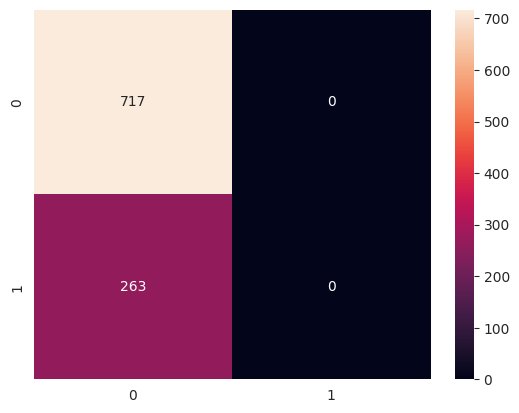

In [45]:
sns.heatmap(confusion_matrix(y_train,lreg_pred_tr),annot=True,fmt="0");

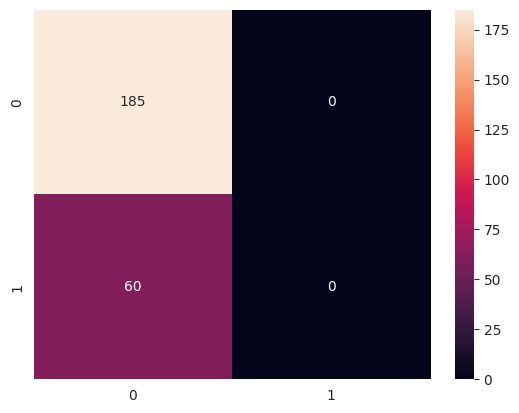

In [46]:
sns.heatmap(confusion_matrix(y_test,lreg_pred_te),annot=True,fmt="0");

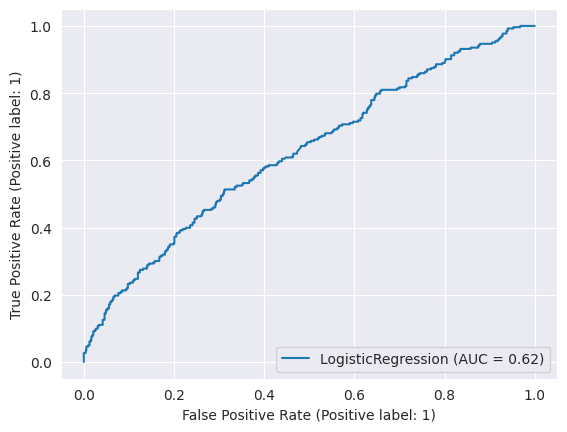

In [47]:
RocCurveDisplay.from_estimator(lreg, X_train, y_train);

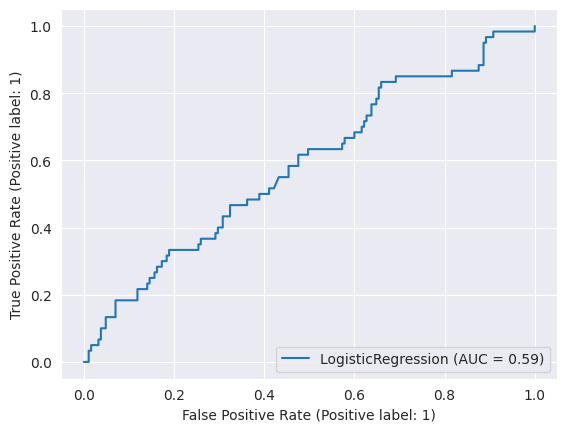

In [48]:
RocCurveDisplay.from_estimator(lreg, X_test, y_test);

**Decision tree classifier**

In [49]:
dtc = DecisionTreeClassifier(random_state=123, max_depth=3, min_samples_split=15, min_samples_leaf=5)
dtc.fit(X_train,y_train)

dtc_pred_tr = dtc.predict(X_train)
dtc_pred_te = dtc.predict(X_test)

pd.concat([eval_metrics('dtc','train',y_train,dtc_pred_tr),
           eval_metrics('dtc','test',y_test,dtc_pred_te)],
          ignore_index=True, axis=0)

,model,sample,acc,acc_bal,rec,pre,f1
0,dtc,train,0.756,0.127,0.148,0.722,0.246
1,dtc,test,0.771,0.123,0.150,0.643,0.243


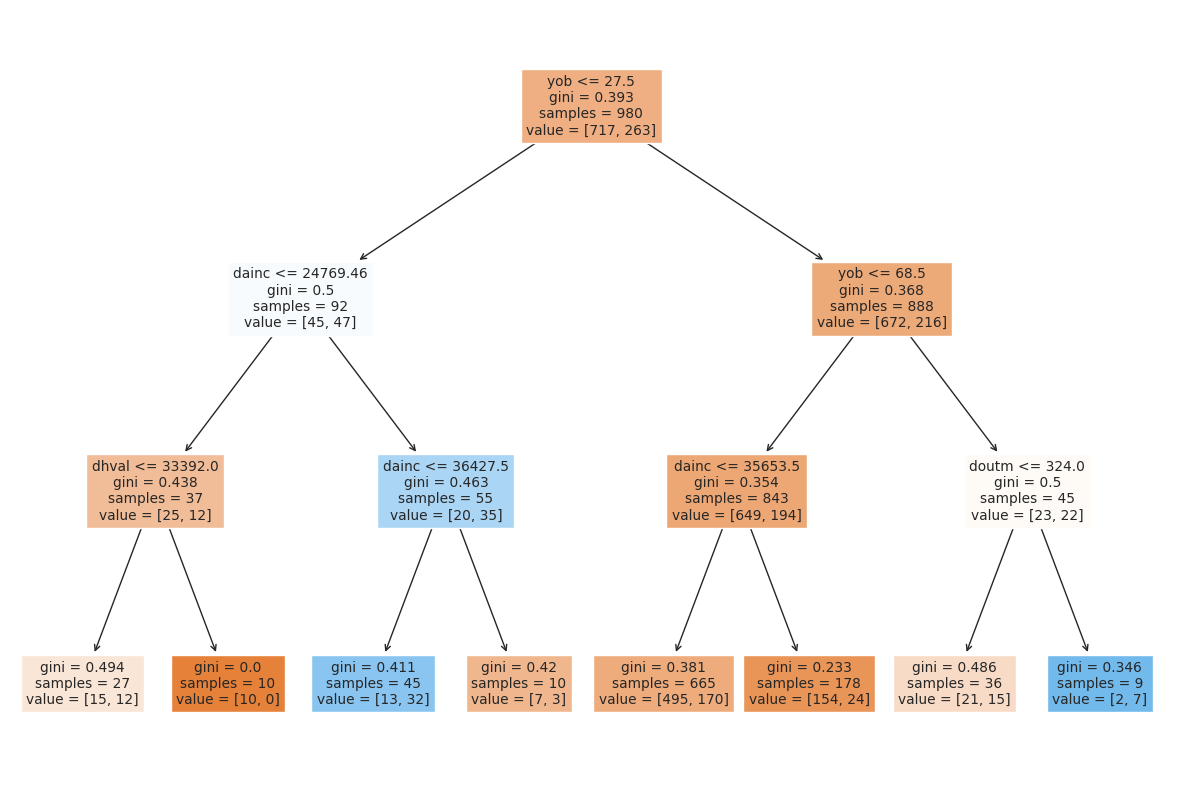

In [50]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtc,
                   feature_names=X_train.columns,
                   filled=True)

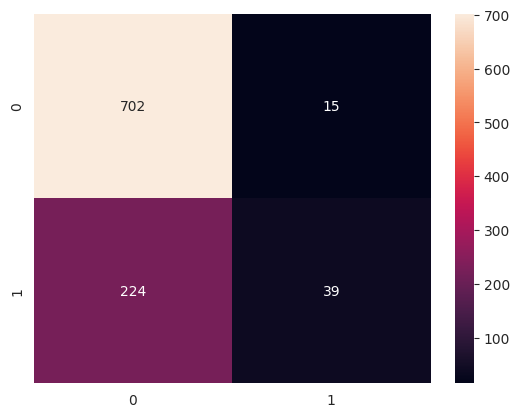

In [51]:
sns.heatmap(confusion_matrix(y_train,dtc_pred_tr),annot=True,fmt="0");

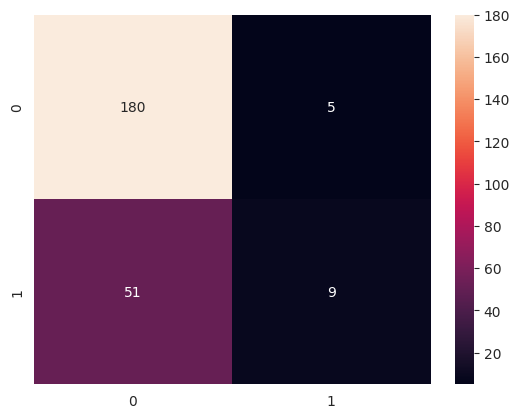

In [52]:
sns.heatmap(confusion_matrix(y_test,dtc_pred_te),annot=True,fmt="0");

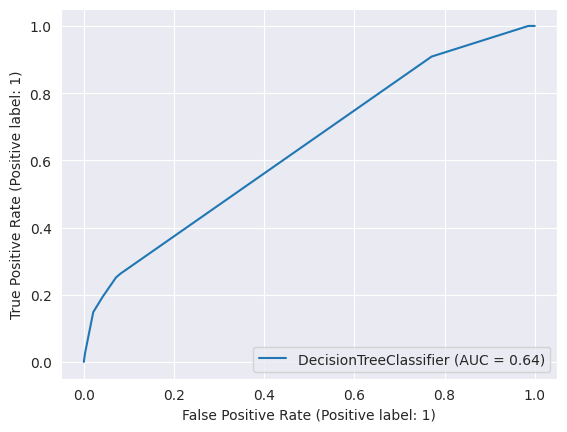

In [53]:
RocCurveDisplay.from_estimator(dtc, X_train, y_train);

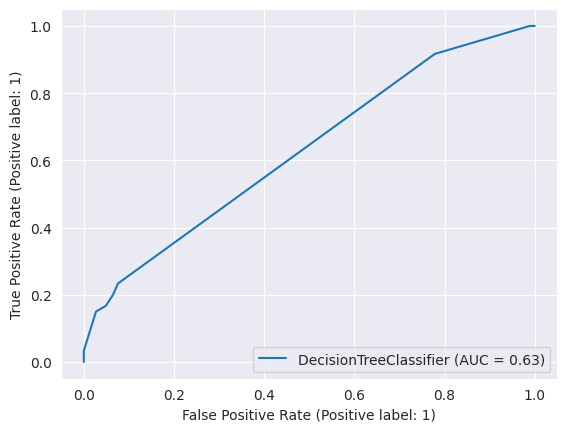

In [54]:
RocCurveDisplay.from_estimator(dtc, X_test, y_test);

**Random Forest classifier**

In [55]:
rf = RandomForestClassifier(random_state=123, n_estimators=1000, max_depth=15, min_samples_leaf=10)
rf.fit(X_train,y_train)

rf_pred_tr = rf.predict(X_train)
rf_pred_te = rf.predict(X_test)

pd.concat([eval_metrics('rf','train',y_train,rf_pred_tr),
           eval_metrics('rf','test',y_test,rf_pred_te)],
          ignore_index=True, axis=0)

,model,sample,acc,acc_bal,rec,pre,f1
0,rf,train,0.756,0.113,0.125,0.786,0.216
1,rf,test,0.747,0.045,0.083,0.417,0.139


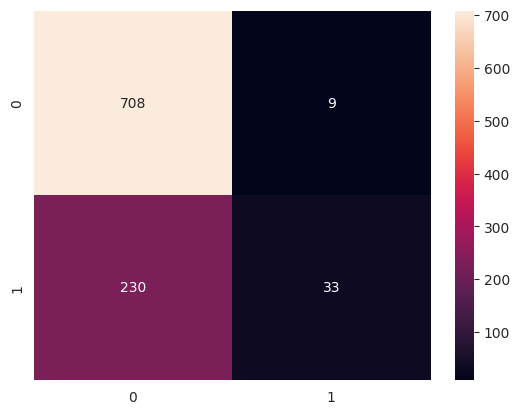

In [56]:
sns.heatmap(confusion_matrix(y_train,rf_pred_tr),annot=True,fmt="0");

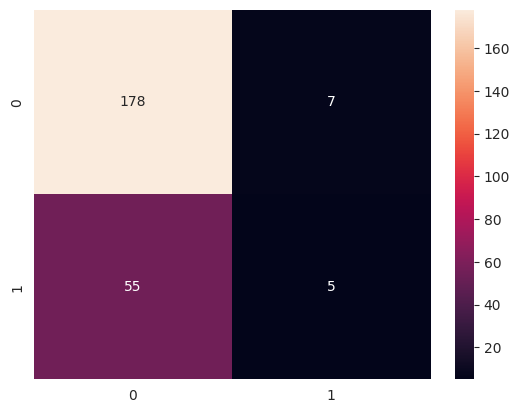

In [57]:
sns.heatmap(confusion_matrix(y_test,rf_pred_te),annot=True,fmt="0");

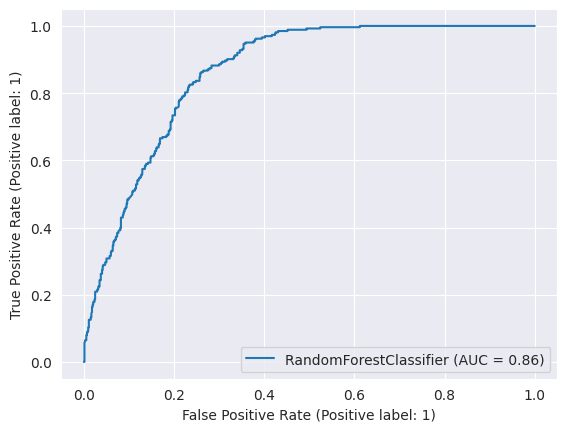

In [58]:
RocCurveDisplay.from_estimator(rf, X_train, y_train);

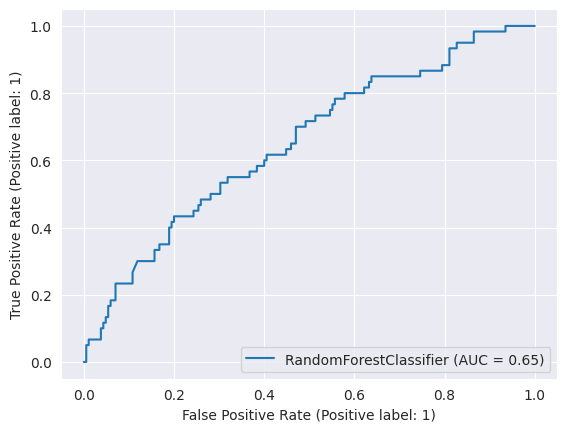

In [59]:
RocCurveDisplay.from_estimator(rf, X_test, y_test);

**Randm Forest Feature Importanc:**
Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

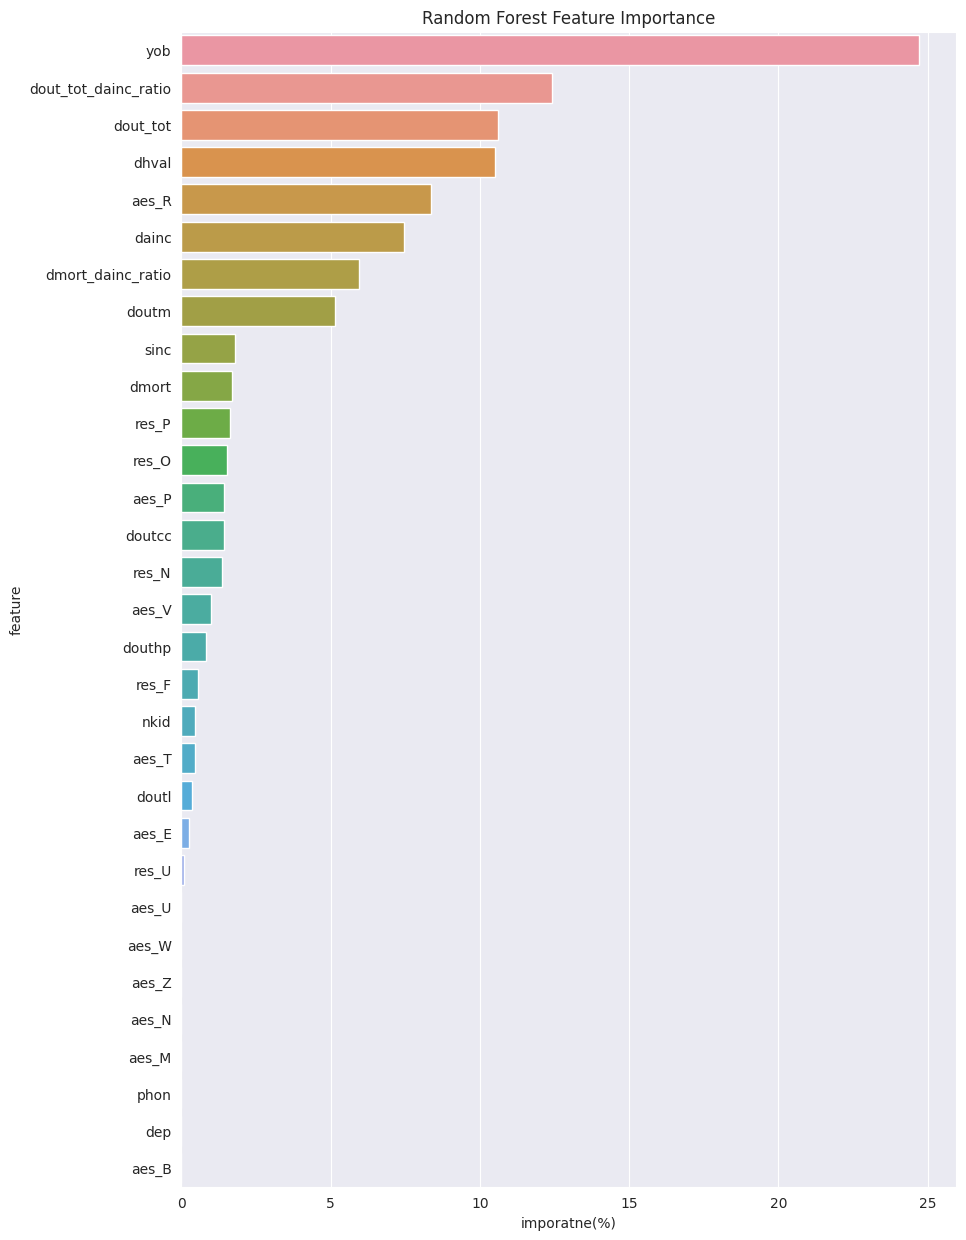

In [60]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=15, random_state=123, n_jobs=2)
forest_importances = pd.DataFrame(np.abs(result.importances_mean), index=X_train.columns).reset_index()
forest_importances.columns = ['feature','importance']
forest_importances['imporatne(%)'] = np.round(100*forest_importances.importance / forest_importances.importance.sum(),2)
forest_importances =  forest_importances.sort_values(by='imporatne(%)',ascending=False)
plt.figure(figsize=(10,15))
sns.barplot(data=forest_importances, y='feature',x='imporatne(%)').set(title='Random Forest Feature Importance');

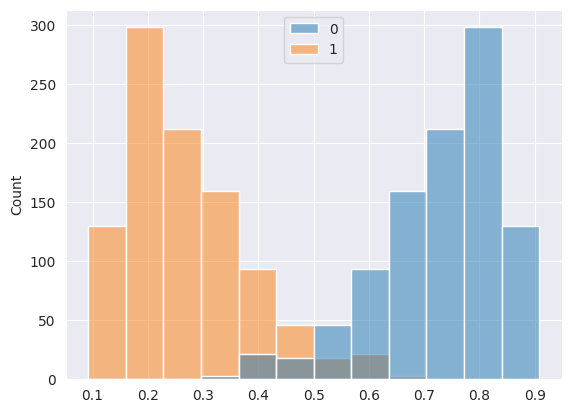

In [61]:
#probability of good/bad can also be extracted for train data
rf_pred_tr_prob = rf.predict_proba(X_train)
sns.histplot(rf_pred_tr_prob);

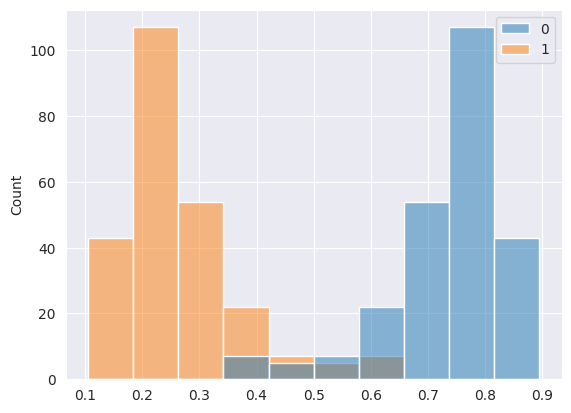

In [62]:
#probability of good/bad can also be extracted for test data
rf_pred_te_prob = rf.predict_proba(X_test)
sns.histplot(rf_pred_te_prob);

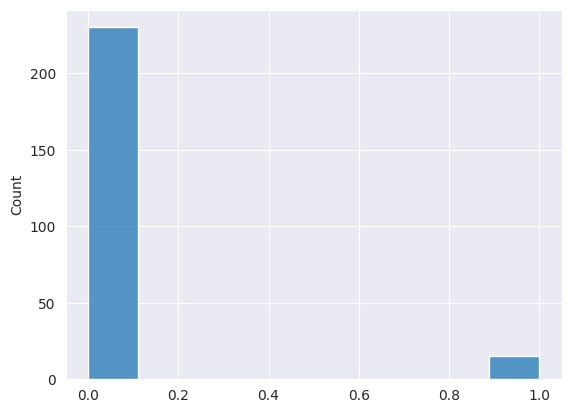

In [63]:
#probability of good/bad can also be extracted for test data, using a different threshold e.g. 0.45
rf_pred_te_prob_new_threshold = (rf.predict_proba(X_test)[:,1]>=0.45).astype(int)
sns.histplot(rf_pred_te_prob_new_threshold);

### **Summary**

The Random forest classifier seems to yield the best performance across both training and test samples. It is therefore a good candidte to be adopted in practicefor evaluting credit risk. Some of the highlighted top predictors are applicants' age, total outgoing expenses as percentage of the income, and the value of the house. Having said that, there are important considerations when it comes to the implementation and use of such machine learning models in practice.

It is essential to carefully review and validate the outcome of a predictive model to ensure not only statistical significance, but also business domain sensibility and substance. For example, what are the financial consequences of misclassifying applicants? Usually, the cost of a false positive (incorrectly saying that an applicant is a good credit risk) outweigh the benefits of a true positive (correctly saying that an applicant is a good credit risk) by a large margin due to the financial loss associtaed with default/ debt collection/write off.

As another example, we may also ask: how similar are the profiles of future applicants' to those in the general pool of applicants for which the model was developed. This notion is known as "drift" in data and model, and highlights the importance of monitoring practices to quantify model sensitivity, risk threshold setting, and model calibration over time.

The above example, is a use case of the sophisticated data driven processes used in the credit risk departments of many banks and financial institutions. Fraud detection is another important area where machine learning and AI are increasingly used as effective tools to support decision making and risk analysis.